20714
Image:


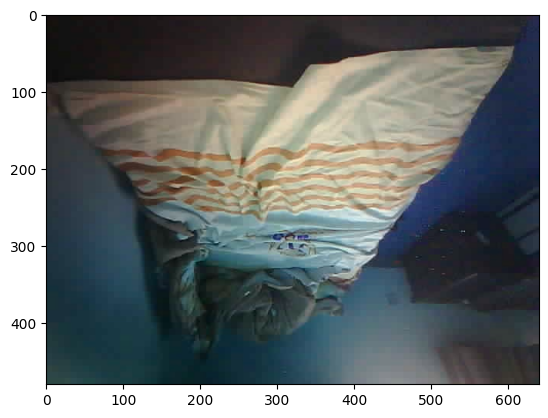

IRA MLX:


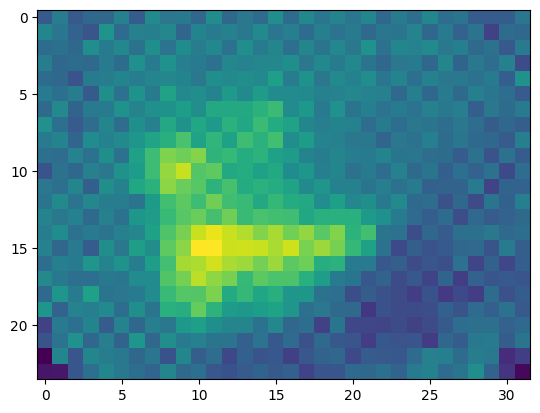

IRA Highres:


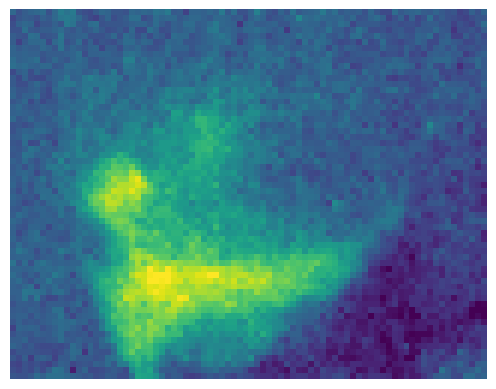

ToF:


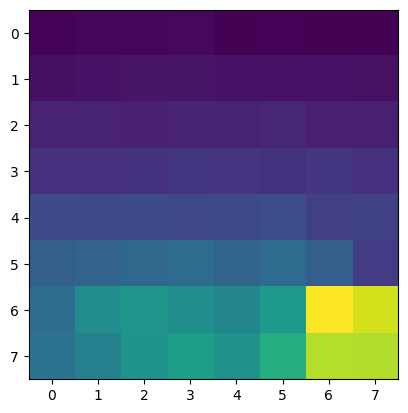

In [17]:
import os
import pickle
import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# For Jupyter notebooks, use os.chdir to set working directory or use absolute path
os.chdir('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace')
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from src.dataset import ThermalDataset

dataset = ThermalDataset("/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1")
print(len(dataset))
# usage: get image, ira, ira_highres, tof by index
idx = 484
idx = 876
idx = 1620
image = dataset.get_image(idx)
ira = dataset.get_ira(idx)
ira_highres = dataset.get_ira_highres(idx)
tof = dataset.get_tof(idx)

# visualize
print("Image:")
plt.imshow(image)
plt.show()

print("IRA MLX:")
plt.imshow(ira)
plt.show()

print("IRA Highres:")
# turn off axis
plt.axis('off')
plt.imshow(ira_highres)
plt.show()

print("ToF:")
plt.imshow(tof)
plt.show()


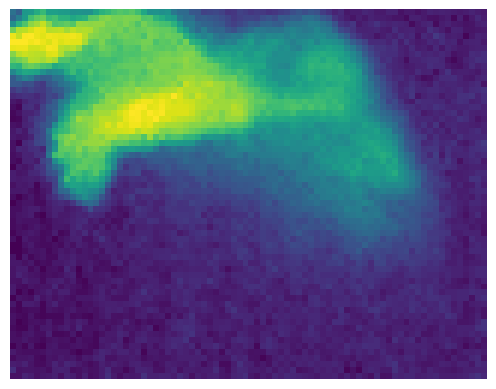

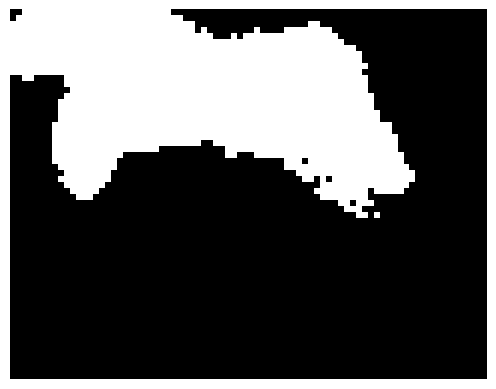

mean temp of new blob:  20.6
residual index:  None


In [3]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from src.organizer_module.kalman_blob import KalmanBlob, mask_to_bbox
from scipy.optimize import linear_sum_assignment
from src.data_collection_module import utils



from src.tracking_module.track_kalman import Tracker

# use data from hall1, frame 18055-18115 for testing

from src.dataset import ThermalDataset
from src.heatsource_detection_module.extract import HeatSourceDetector

idx = 10497
dataset = ThermalDataset("/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1")
detector = HeatSourceDetector()
tracker = Tracker()

ira_highres = dataset.get_ira_highres(idx)
# rotate image 180 degrees
ira_highres = cv2.rotate(ira_highres, cv2.ROTATE_180)
thresh, mask = detector.get_thresh_mask_otsu(ira_highres)
cleaned_mask = detector.get_connected_components(mask, min_size=10)
# turn off axes for plt
plt.axis('off')
plt.imshow(ira_highres)
plt.show()
plt.axis('off')
plt.imshow(mask, cmap='gray')
plt.show()

tracker.update_blobs(cleaned_mask, ira_highres, detector.get_unmasked_mean(ira_highres, mask), idx)

ira_color = utils.colorize_thermal_map(ira_highres)
IRA_height, IRA_width = ira_highres.shape
ira_color = cv2.resize(ira_color, (IRA_width*5, IRA_height*5), interpolation=cv2.INTER_NEAREST)
for i, blob in enumerate(tracker.blobs):
    if len(blob.kalman_centroid_history) == 0:
        continue
    cX, cY = blob.kalman_centroid_history[-1]
    cv2.putText(ira_color, str(blob.id), (int(cX)*5, int(cY)*5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)



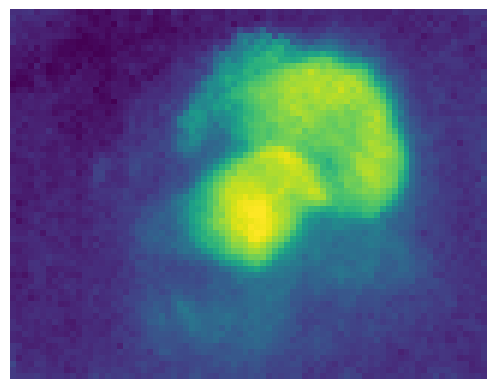

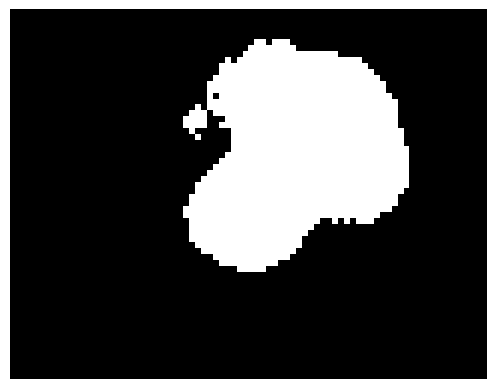

mean temp of new blob:  22.77
residual index:  None


In [16]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from src.organizer_module.kalman_blob import KalmanBlob, mask_to_bbox
from scipy.optimize import linear_sum_assignment
from src.data_collection_module import utils



from src.tracking_module.track_kalman import Tracker

# use data from hall1, frame 18055-18115 for testing

from src.dataset import ThermalDataset
from src.heatsource_detection_module.extract import HeatSourceDetector

idx = 10520
idx=800
dataset = ThermalDataset("/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1")
detector = HeatSourceDetector()
tracker = Tracker()

ira_highres = dataset.get_ira_highres(idx)
# rotate image 180 degrees
ira_highres = cv2.rotate(ira_highres, cv2.ROTATE_180)
thresh, mask = detector.get_thresh_mask_otsu(ira_highres)
cleaned_mask = detector.get_connected_components(mask, min_size=10)
# turn off axes for plt
plt.axis('off')
plt.imshow(ira_highres)
plt.show()
plt.axis('off')
plt.imshow(mask, cmap='gray')
plt.show()

tracker.update_blobs(cleaned_mask, ira_highres, detector.get_unmasked_mean(ira_highres, mask), idx)

ira_color = utils.colorize_thermal_map(ira_highres)
IRA_height, IRA_width = ira_highres.shape
ira_color = cv2.resize(ira_color, (IRA_width*5, IRA_height*5), interpolation=cv2.INTER_NEAREST)
for i, blob in enumerate(tracker.blobs):
    if len(blob.kalman_centroid_history) == 0:
        continue
    cX, cY = blob.kalman_centroid_history[-1]
    cv2.putText(ira_color, str(blob.id), (int(cX)*5, int(cY)*5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

